In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [9]:
phones = pd.read_csv('top 120 best-selling mobile phones.csv')

In [10]:
phones

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,1,Nokia,1100,Bar,False,2003,250.0
1,2,Nokia,1110,Bar,False,2005,247.5
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,4,Nokia,105 Series,Bar,False,2013,200.0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1
...,...,...,...,...,...,...,...
115,116,Samsung,Samsung Galaxy A55,Touchscreen,True,2024,2.7
116,117,Samsung,Samsung Galaxy S24,Touchscreen,True,2024,2.4
117,118,Samsung,Samsung Galaxy A15 4G,Touchscreen,True,2023,2.2
118,119,Google,Pixel & Pixel XL,Touchscreen,True,2016,2.1


# Total Units Sold By Manufacturer

In [11]:
total_units_sold_per_manufacturer = phones.groupby('Manufacturer')['Units Sold (million )'].sum()
total_units_sold_per_manufacturer = total_units_sold_per_manufacturer.sort_values(ascending=False).reset_index()

In [12]:
total_units_sold_per_manufacturer['Units Sold (million )'] = total_units_sold_per_manufacturer['Units Sold (million )']/1000
total_units_sold_per_manufacturer = total_units_sold_per_manufacturer.rename(columns={'Units Sold (million )': 'Units Sold (billion)'})
total_units_sold_per_manufacturer

,Manufacturer,Units Sold (billion)
0,Nokia,2.3745
1,Apple,1.6693
2,Samsung,0.9945
3,Motorola,0.3230
4,Huawei,0.1138
5,Xiaomi,0.0991
6,LG,0.0920
7,Sony Ericsson,0.0450
8,Oppo,0.0167
9,HTC,0.0160


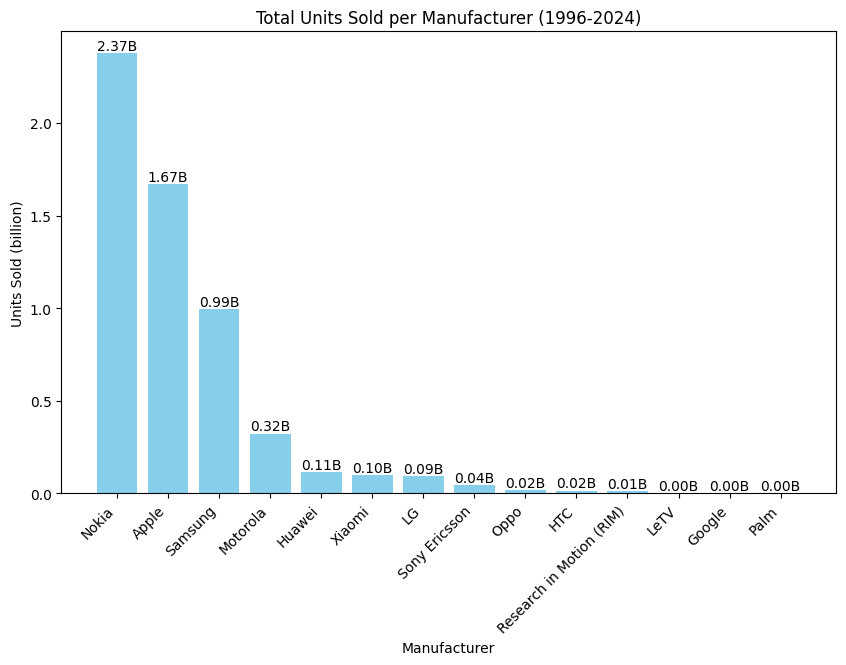

In [48]:
# Create a bar plot
plt.figure(figsize=(10, 6))

# Plot the bar graph
bars = plt.bar(total_units_sold_per_manufacturer['Manufacturer'], total_units_sold_per_manufacturer['Units Sold (billion)'], color='skyblue')

# Add title and labels
plt.title('Total Units Sold per Manufacturer (1996-2024)')
plt.xlabel('Manufacturer')
plt.ylabel('Units Sold (billion)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Loop through bars and add text labels on top
for bar, value in zip(bars, total_units_sold_per_manufacturer['Units Sold (billion)']):
  # Get bar height and adjust for positioning (optional)
  yval = bar.get_height()   # Adjust offset as needed
  plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{value:.2f}B", ha='center', va='bottom')

# Show the plot
plt.show()


# Total Units Sold Each Year By Manufacturer

In [14]:
units_sold_per_year = phones.groupby(['Manufacturer', 'Year'])['Units Sold (million )'].sum()

In [15]:
units_sold_per_year = units_sold_per_year.reset_index()

In [16]:
units_sold_per_year

,Manufacturer,Year,Units Sold (million )
0,Apple,2007,6.0
1,Apple,2009,35.0
2,Apple,2010,50.0
3,Apple,2011,60.0
4,Apple,2012,146.2
...,...,...,...
65,Sony Ericsson,2005,15.0
66,Sony Ericsson,2006,15.0
67,Xiaomi,2012,10.0
68,Xiaomi,2019,74.1


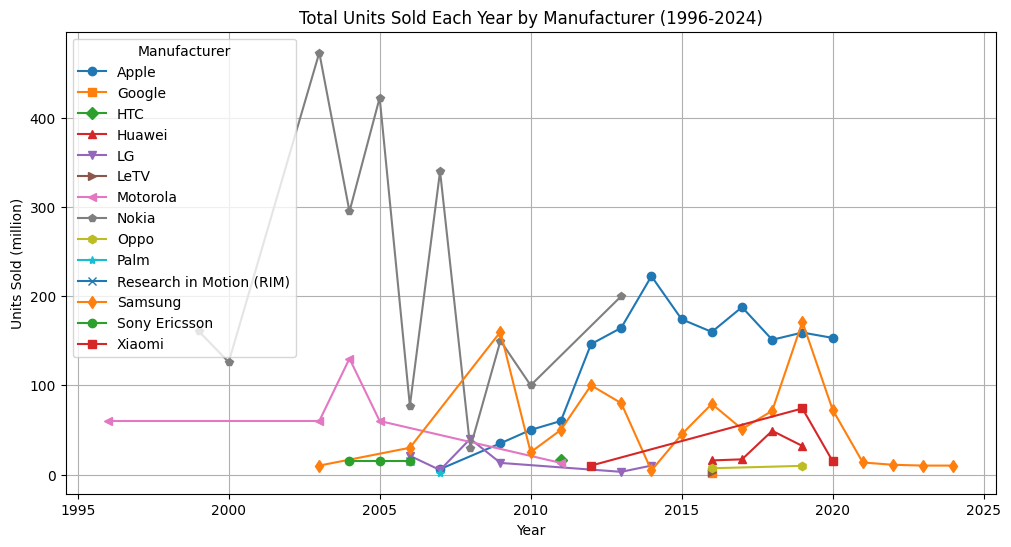

In [17]:
# Define a list of markers
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', 'h', '*', 'x', 'd']

# Create a line plot
plt.figure(figsize=(12, 6))

# Loop through each manufacturer and plot their data
for i, manufacturer in enumerate(units_sold_per_year['Manufacturer'].unique()):
    manufacturer_data = units_sold_per_year[units_sold_per_year['Manufacturer'] == manufacturer]
    plt.plot(
        manufacturer_data['Year'], 
        manufacturer_data['Units Sold (million )'], 
        marker=markers[i % len(markers)],  # Cycle through the markers
        label=manufacturer
    )

# Add title and labels
plt.title('Total Units Sold Each Year by Manufacturer (1996-2024)')
plt.xlabel('Year')
plt.ylabel('Units Sold (million)')

# Add a legend
plt.legend(title='Manufacturer')

# Show the plot
plt.grid(True)
plt.show()


In [18]:
phones[phones['Year'] == 2019]

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
8,9,Apple,"iPhone11, 11Pro & 11Pro Max",Touchscreen,True,2019,159.2
41,42,Samsung,"Galaxy S10, Galaxy S10+ & Galaxy S10e",Touchscreen,True,2019,37.0
46,47,Samsung,Galaxy A10,Touchscreen,True,2019,30.3
51,52,Xiaomi,Redmi Note 8 & Redmi Note 8 Pro,Touchscreen,True,2019,30.0
56,57,Samsung,Galaxy A50,Touchscreen,True,2019,24.2
58,59,Samsung,Galaxy A51,Touchscreen,True,2019,23.2
59,60,Samsung,Galaxy A20,Touchscreen,True,2019,23.1
62,63,Xiaomi,Redmi Note 7 & Redmi Note 7 Pro,Touchscreen,True,2019,20.0
63,64,Huawei,P30 & P30 Pro,Touchscreen,True,2019,20.0
67,68,Samsung,Galaxy A01,Touchscreen,True,2019,16.9


In [7]:
# phones.to_excel('top_selling_smartphones.xlsx', index=False)

# Traditional vs Smartphone 


In [19]:
traditional_vs_smartphone = phones.groupby('Smartphone?').agg({'Smartphone?': 'count', 'Units Sold (million )': 'sum'})

In [20]:
traditional_vs_smartphone['Units Sold (million )'] = round(traditional_vs_smartphone['Units Sold (million )']/1000, 2)

In [21]:
traditional_vs_smartphone = traditional_vs_smartphone.rename(columns={'Units Sold (million )': 'units_sold (billions)'})

In [22]:
traditional_vs_smartphone

,Smartphone?,units_sold (billions)
Smartphone?,,
False,35,2.62
True,85,3.15


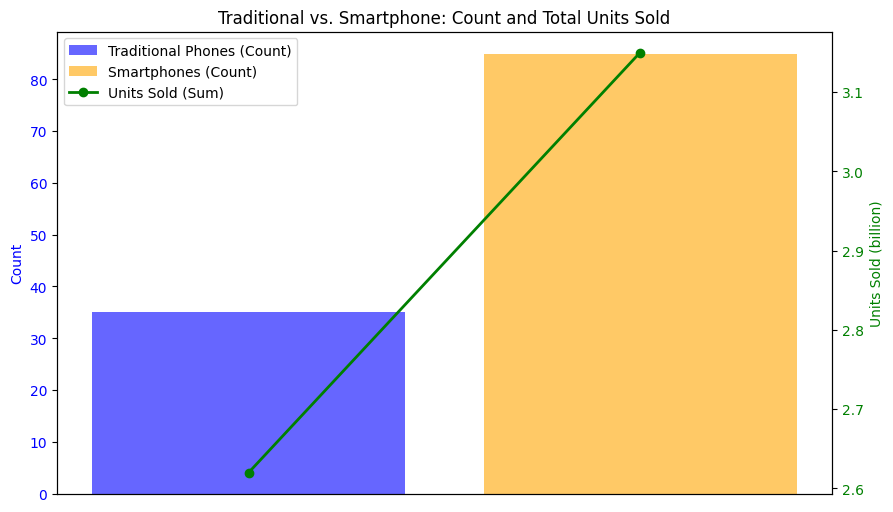

In [23]:
# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the count on the first y-axis
bars = ax1.bar(traditional_vs_smartphone.index, traditional_vs_smartphone['Smartphone?'], color=['blue', 'orange'], alpha=0.6)
# ax1.set_xlabel('Smartphone?')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Remove x-axis labels and ticks
ax1.set_xticks([])

# Second y-axis to plot the sum of units sold
ax2 = ax1.twinx()
line, = ax2.plot(traditional_vs_smartphone.index, traditional_vs_smartphone['units_sold (billions)'], color='green', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Units Sold (billion)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Traditional vs. Smartphone: Count and Total Units Sold')

# Custom legend
plt.legend([bars[0], bars[1], line], ['Traditional Phones (Count)', 'Smartphones (Count)', 'Units Sold (Sum)'])

# Show the plot
plt.show()


In [ ]:
# More smartphones units were sold than traditional phones 
# The last traditional phone(s) was sold/released in 2013, they been in the market for 17 years
# Smartphones been in the market for 21 years  

In [24]:
phones[phones['Smartphone?'] == True].sort_values(by='Year')

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
112,113,Nokia,N-Gage,Taco,True,2003,3.0
10,11,Nokia,6600,Bar,True,2003,150.0
38,39,Nokia,N70(N72/N73),Bar,True,2005,45.0
78,79,Research in Motion (RIM),BlackBerry Pearl,Bar,True,2006,15.0
119,120,Palm,Centro,Keyboard bar,True,2007,2.0
...,...,...,...,...,...,...,...
117,118,Samsung,Samsung Galaxy A15 4G,Touchscreen,True,2023,2.2
110,111,Samsung,Samsung Galaxy S23 FE,Touchscreen,True,2023,3.8
106,107,Samsung,Samsung Galaxy S24 Ultra,Touchscreen,True,2024,4.9
115,116,Samsung,Samsung Galaxy A55,Touchscreen,True,2024,2.7


# Is every smartphone have a touchscreen?

In [25]:
# Create a new column 'smartphone_with_touchscreen?' based on the conditions
phones['smartphone_with_touchscreen?'] = np.where(
    (phones['Form Factor'] == 'Touchscreen') & (phones['Smartphone?'] == True),
    1,
    0
)


In [26]:
phones

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million ),smartphone_with_touchscreen?
0,1,Nokia,1100,Bar,False,2003,250.0,0
1,2,Nokia,1110,Bar,False,2005,247.5,0
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4,1
3,4,Nokia,105 Series,Bar,False,2013,200.0,0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1,1
...,...,...,...,...,...,...,...,...
115,116,Samsung,Samsung Galaxy A55,Touchscreen,True,2024,2.7,1
116,117,Samsung,Samsung Galaxy S24,Touchscreen,True,2024,2.4,1
117,118,Samsung,Samsung Galaxy A15 4G,Touchscreen,True,2023,2.2,1
118,119,Google,Pixel & Pixel XL,Touchscreen,True,2016,2.1,1


In [27]:
# Filter the dataset for smartphones (Smartphone? == True)
smartphones = phones[phones['Smartphone?'] == True]

# Check if all smartphones have the "Touchscreen" form factor
all_touchscreen = smartphones['Form Factor'].eq('Touchscreen').all()

if all_touchscreen:
    print("All smartphones have the Touchscreen form factor.")
else:
    print("Not all smartphones have the Touchscreen form factor.")


Not all smartphones have the Touchscreen form factor.


In [28]:
smartphone_with_touchscreen = smartphones.groupby('smartphone_with_touchscreen?')['smartphone_with_touchscreen?'].count()

In [29]:
smartphone_with_touchscreen_df = pd.DataFrame(smartphone_with_touchscreen)

In [30]:
smartphone_with_touchscreen_df = smartphone_with_touchscreen_df.rename(columns={'smartphone_with_touchscreen?': 'count_smartphone_with_touchscreen'})

In [31]:
smartphone_with_touchscreen_df

,count_smartphone_with_touchscreen
smartphone_with_touchscreen?,
0,7
1,78


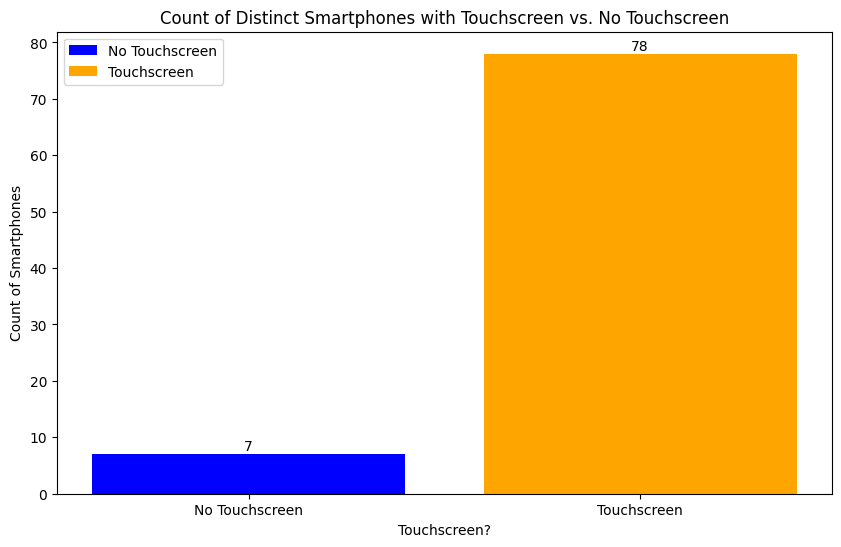

In [45]:
# Create a bar plot
plt.figure(figsize=(10, 6))

# Plot the bar graph
bars = plt.bar(smartphone_with_touchscreen_df.index, smartphone_with_touchscreen_df['count_smartphone_with_touchscreen'], color=['blue', 'orange'])

# Add title and labels
plt.title('Count of Distinct Smartphones with Touchscreen vs. No Touchscreen')
plt.xlabel('Touchscreen?')
plt.ylabel('Count of Smartphones')

# Set custom labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['No Touchscreen', 'Touchscreen'])

# Add legend
plt.legend(bars, ['No Touchscreen', 'Touchscreen'])

# Loop through bars and add text labels on top
for bar, value in zip(bars, smartphone_with_touchscreen_df['count_smartphone_with_touchscreen']):
  # Get bar height and adjust for positioning (optional)
  yval = bar.get_height() + 0.1  # Adjust offset as needed
  plt.text(bar.get_x() + bar.get_width() / 2, yval, int(value), ha='center', va='bottom')

# Show the plot
plt.show()


In [68]:
# Not all smartphones have touchscreen  
# There are more smartphones with touchscreen than ones with no touchscreen 

# Which year was most units sold?

In [33]:
total_units_sold_each_year = phones.groupby('Year').agg({'Units Sold (million )': 'sum', 'Year': 'count'})

In [34]:
total_units_sold_each_year = total_units_sold_each_year.rename(columns={'Units Sold (million )': 'total_units_sold_each_year_in_millions', 'Year': 'number_of_phone_models_sold_each_year'})

In [35]:
total_units_sold_each_year

,total_units_sold_each_year_in_millions,number_of_phone_models_sold_each_year
Year,,
1996,60.0,1
1999,161.0,1
2000,126.0,1
2003,543.0,7
2004,440.0,6
2005,497.5,5
2006,158.0,6
2007,353.0,8
2008,70.0,4


In [38]:
phones[(phones['Manufacturer'] == 'Samsung') & (phones['Year'] == 2019)]

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million ),smartphone_with_touchscreen?
41,42,Samsung,"Galaxy S10, Galaxy S10+ & Galaxy S10e",Touchscreen,True,2019,37.0,1
46,47,Samsung,Galaxy A10,Touchscreen,True,2019,30.3,1
56,57,Samsung,Galaxy A50,Touchscreen,True,2019,24.2,1
58,59,Samsung,Galaxy A51,Touchscreen,True,2019,23.2,1
59,60,Samsung,Galaxy A20,Touchscreen,True,2019,23.1,1
67,68,Samsung,Galaxy A01,Touchscreen,True,2019,16.9,1
98,99,Samsung,Galaxy A30,Touchscreen,True,2019,9.2,1
109,110,Samsung,Galaxy A10s,Touchscreen,True,2019,3.9,1
111,112,Samsung,Galaxy A30s,Touchscreen,True,2019,3.4,1


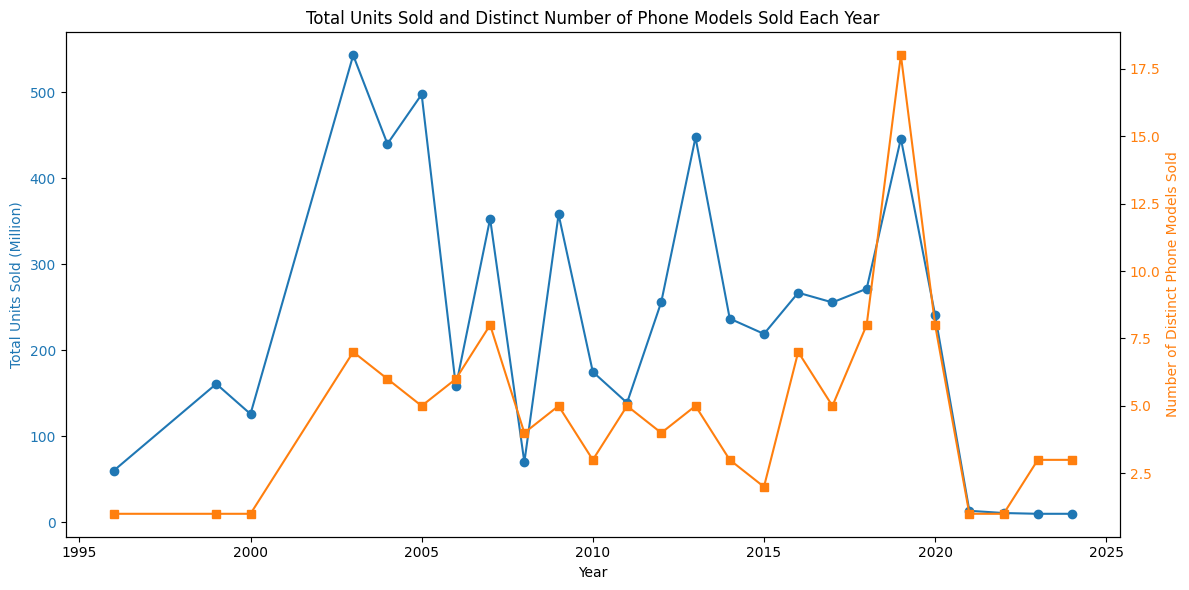

In [50]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total units sold each year on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Units Sold (Million)', color='tab:blue')
ax1.plot(total_units_sold_each_year.index, total_units_sold_each_year['total_units_sold_each_year_in_millions'], color='tab:blue', marker='o', label='Total Units Sold (Million)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the number of phones sold each year
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Distinct Phone Models Sold', color='tab:orange')
ax2.plot(total_units_sold_each_year.index, total_units_sold_each_year['number_of_phone_models_sold_each_year'], color='tab:orange', marker='s', label='Number of Phones Sold')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and legend
plt.title('Total Units Sold and Distinct Number of Phone Models Sold Each Year')
fig.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()


In [ ]:
#Most units were sold around 2003 - 2005 but fewer models mainly because this was the first time smartphones/touchscreen phones were introduced
#Again in 2019 most units were sold and more different models were also introduced in the market, the likes of Hauwei, Xaomi, Oppo and of course Samsung and iPhone

# Best selling phones per manufacturer

In [40]:
# Group by Manufacturer and Model and sum the Units Sold (million)
best_selling_phone_per_manufacturer = phones.groupby(['Manufacturer', 'Model','Year'])['Units Sold (million )'].sum()

# Sort the results by Units Sold (million) within each group
best_selling_phone_per_manufacturer = best_selling_phone_per_manufacturer.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))

In [41]:
best_selling_phone_per_manufacturer = pd.DataFrame(best_selling_phone_per_manufacturer)

In [42]:
# Select the first row for each Manufacturer
top_phone_per_manufacturer = best_selling_phone_per_manufacturer.groupby('Manufacturer').head(1).reset_index().sort_values(by='Units Sold (million )', ascending=False)


In [43]:
top_phone_per_manufacturer

,Manufacturer,Model,Year,Units Sold (million )
7,Nokia,1100,2003,250.0
0,Apple,iPhone 6 & 6 Plus,2014,222.4
11,Samsung,E1100,2009,150.0
6,Motorola,RAZRV3,2004,130.0
3,Huawei,"P20, P20 Pro & P20 Lite",2018,32.0
4,LG,KP100,2008,30.0
13,Xiaomi,Redmi Note 8 & Redmi Note 8 Pro,2019,30.0
2,HTC,ThunderBolt,2011,16.0
10,Research in Motion (RIM),BlackBerry Pearl,2006,15.0
12,Sony Ericsson,K300(K310),2004,15.0


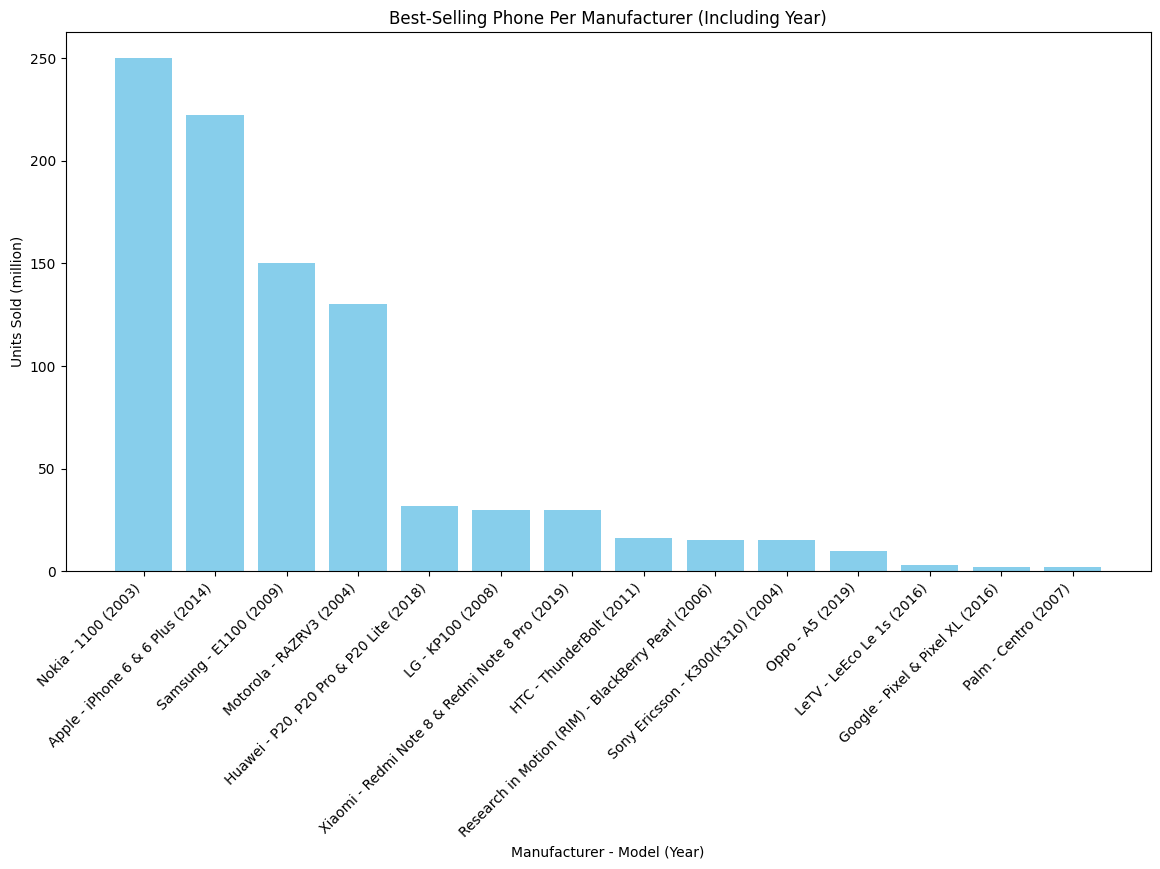

In [44]:
import matplotlib.pyplot as plt

# Combine Manufacturer, Model, and Year into a single label
top_phone_per_manufacturer['Label'] = (
    top_phone_per_manufacturer['Manufacturer'] 
    + ' - ' 
    + top_phone_per_manufacturer['Model'] 
    + ' (' 
    + top_phone_per_manufacturer['Year'].astype(str) 
    + ')'
)

# Plot the best-selling phone per manufacturer
plt.figure(figsize=(14, 7))

# Create a bar plot with the combined labels on the x-axis
plt.bar(top_phone_per_manufacturer['Label'], top_phone_per_manufacturer['Units Sold (million )'], color='skyblue')

# Add labels and title
plt.title('Best-Selling Phone Per Manufacturer (Including Year)')
plt.xlabel('Manufacturer - Model (Year)')
plt.ylabel('Units Sold (million)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
